<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#A-notebook-visualizing-a-dirichlet-distribution" data-toc-modified-id="A-notebook-visualizing-a-dirichlet-distribution-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>A notebook visualizing a dirichlet distribution</a></span></li><li><span><a href="#What-is-a-Dirichlet-Distribution?" data-toc-modified-id="What-is-a-Dirichlet-Distribution?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>What is a Dirichlet Distribution?</a></span><ul class="toc-item"><li><span><a href="#Case-Study:-Dice" data-toc-modified-id="Case-Study:-Dice-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Case Study: Dice</a></span></li></ul></li><li><span><a href="#Setting-up-the-code" data-toc-modified-id="Setting-up-the-code-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Setting up the code</a></span></li><li><span><a href="#Output" data-toc-modified-id="Output-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Output</a></span></li></ul></div>

# A notebook visualizing a dirichlet distribution
by Sanket Mehrotra

For my understanding of a latent dirichlet allocation as specified in [this paper](https://oudalab.github.io/papers/grant2015topic.pdf) about developing Topic Based Search engines. Code and material from [this page](http://blog.bogatron.net/blog/2014/02/02/visualizing-dirichlet-distributions/)

# What is a Dirichlet Distribution?

A distribution that can help us find the probability(or probablility density) under certain multinomial distribution conditions:


## Case Study: Dice 

To understand what the Dirichlet distribution describes, it is useful to consider how it can characterize the variability of a random multinomial distribution. Suppose we are going to manufacture 6-sided dice. But for this example, we only want the allowable outcome of a die roll to be the number 1, 2, or 3. So when we produce a die, we will place the number 1 on two of the faces and likewise for the numbers 2 and 3. If we produce a "fair" die, then the probabilites of the three outcomes will be equal (the probability for each outcome will 1/3). We can represent the probabilities for the possible outcomes as a vector ($\theta$)

$$\theta = (\frac{1}{3},\frac{1}{3},\frac{1}{3})$$

If we wanted to cheat, we could produce a "loaded" die, that gives us a higher probability of rolling a 3:

$$\theta = (\frac{0.9}{3},\frac{1}{3},\frac{1.1}{3})$$

Regardless of whether we produce a fair or loaded die, $\theta$ has two imporant properties. 
1. The sum of probabilities for each outcome must equal 1.

$$\Sigma\theta_i = \theta_1 + \theta_2 + \theta_3 = 1$$

2. None of the probabilities can be negative

When these conditions hold, probabilities associated with the results of rolling the die are described by a multinomial distribution.


Regardless of whether we are attempting to produce fair or loaded dice, there will be some variability in the characteristics of the dice we produce. So even if we try to produce fair dice, we won't expect that the probabilities of each outcome for a particular die will be exactly 1/3. If we were to hand-carve each die from a wooden block, we would expect significant variability in the dice we produce, due to the limitations of our craftsmanship, variability in the density of the wood, characteristics of the tools we use, etc. If instead, we were to use a fancy 3D printer to manufacture our dice, we would expect the resulting dice to be much more precise, having significantly less variability than our hand-carved dice.

To characterize this variability mathematically, we would like to know the probability (probability density) of every possible value of 
$\theta$
 for a given manufacturing process. To do this, let's consider each element of 
$\theta$
 as being an independent variable. That is, for $\theta = \{\theta_1,\theta_2,\theta_3\}$, we can treat 
$\theta_1$, $\theta_2$, and $\theta_3$ each as an independent variable and $\theta$ as a vector in a 3-dimensional space. Since the multinomial distribution requires that these three variables sum to 1, we know that the allowable values of $\theta_1$ are confined to a plane. Furthermore, since each value 
$\theta_i$ must be greater than or equal to zero, the set of all allowable values of $\theta$ is confined to an equilateral triangle  (a 2-simplex) as shown below.

![image](http://blog.bogatron.net/downloads/notebooks/images/simplex2.svg)

What we want is to know the probability density at each point on this triangle. That is where the Dirichlet distribution can help us. The Dirichlet distribution defines a probability density for a vector-valued input having the same characteristics as our multinomial parameter ($\theta$). Let's start with the formula for the probability density associated with a Dirichlet distribution:

$$Dir(\alpha) \rightarrow p(\theta | \alpha) = \frac{\Gamma(\Sigma_{i=1}^{k}\alpha_i)}{\Pi_{i=1}^{k}\Gamma(\alpha_i)} \Pi_{i=1}^{k}\theta_i^{\alpha_i -1}$$

It's not important to understand the the formula in its entirety but a few details are worth noting. The Dirichlet distribution is parameterized by the vector $\alpha$, which has the same number of elements (k) as our multinomial parameter $\theta$. In our case, $k=3$. So you can interpret 
$p(\theta∣\alpha)$
 as answering the question "what is the probability density associated with multinomial distribution $\theta$, given that our Dirichlet distribution has parameter $\alpha$." Our goal is to visualize how $Dir(\alpha)$ varies over the simplex of allowable values of $\theta$ for a given value of $\alpha$.

# Setting up the code

Before we can plot our Dirichlet distributions, we need to do three things:

1. Generate a set of Cartesian coordinates over our equilateral triangle

2. Map the Cartesian coordinates to the 2-simplex coordinate space

3. Compute Dir(α) for each point

There are numerous ways we could go about generating a set of points over the simplex. For example, we could randomly sample a uniform Dirichlet and map those points back to the Cartesian space. But that approach can result in undesirable display artifacts near the simplex boundaries for small values of 
α
. As of version 1.3, matplotlib provides some convenient functions we can use for generating and refining triangular meshes. Let's start with the corners of our equilateral triangle and define a triangular mesh consisting of just a single element.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

corners = np.array([[0,0],[1,0],[0.5,0.75**0.5]])
AREA = 0.5 * 1 * 0.75**0.5
triangle = tri.Triangulation(corners[:,0],corners[:,1])

In [8]:
print(corners,"\n\n",AREA)

[[0.        0.       ]
 [1.        0.       ]
 [0.5       0.8660254]] 

 0.4330127018922193


In [10]:
print(corners[:,0],corners[:,1], triangle)

[0.  1.  0.5] [0.        0.        0.8660254] <matplotlib.tri.triangulation.Triangulation object at 0x00000230B63DD508>


In [11]:
refiner = tri.UniformTriRefiner(triangle)

In [12]:
trimesh = refiner.refine_triangulation(subdiv=4)

In [17]:
trimesh?

In [15]:
plt.figure(figsize=(8,4))

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

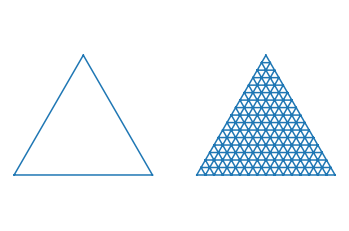

In [24]:
for (i,mesh) in enumerate((triangle,trimesh)):
    plt.subplot(1,2,1+i)
    plt.triplot(mesh)
    plt.axis('off')
    plt.axis('equal')

The mesh above is just an example - we'll use a much finer mesh for our plots.

Next, we need to map the x-y coordinates of the mesh vertices to the simplex coordinate space (a.k.a. barycentric coordinates). There are several ways to perform this transform. For each corner of the triangle, the associated barycentric coordinate component for a point (x, y) is equal to the fraction of the triangle covered by a new triangle created by replacing the corner with (x, y). For some values of 
α
, calculation of the Dirichlet pdf can become numerically unstable at the boundaries of the simplex so our conversion function will take an optional tolerance that will avoid barycentric coordinate values directly on the simplex boundary.

In [34]:
# For each corner of the triangle, the pair of other corners
pairs = [corners[np.roll(range(3),-i)[1:]] for i in range(3)]
print(pairs[0])

[[1.        0.       ]
 [0.5       0.8660254]]


In [39]:
np.cross?

In [38]:
# The area of the triangle formed by point xy and another pair or points
tri_area = lambda xy, pair: 0.5 * np.linalg.norm(np.cross(*(pair-xy)))
print(tri_area(4,pairs[0]))

2.299038105676658


In [41]:
np.clip?

In [42]:
def xy2bc(xy, tolerance=1.e-4):
    '''Converts 2D Cartesian coordinates to barycentric.'''
    coords = np.array([tri_area(xy, p) for p in pairs]) / AREA
    return np.clip(coords, tolerance, 1.0 - tolerance)

Having the barycentric coordinates for our simplex mesh vertices, we then need to compute the Dirichlet pdf values for these coordinates.

In [43]:
class Dirichlet(object):
    def __init__(self, alpha):
        from math import gamma
        from operator import mul
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / np.multiply.reduce([gamma(a) for a in self._alpha])
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        from operator import mul
        return self._coef * np.multiply.reduce([xx ** (aa - 1) for (xx, aa)in zip(x, self._alpha)])

And lastly, we just need a function to draw the contours for a distribution. The function will draw pdf contours for a Dirichlet distribution where 
θ
1
, 
θ
2
, and 
θ
3
 correspond to the lower left, lower right, and upper corners of the rendered triangle, respectively.

In [44]:
def draw_pdf_contours(dist, nlevels=200, subdiv=8, **kwargs):
    import math

    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, cmap='jet', **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')

# Output

Let's start with a few symmetric Dirichlet distributions. The case of $α_i (1,1,1)$, yields a uniform distribution, where all points on the simplex are equally probable:

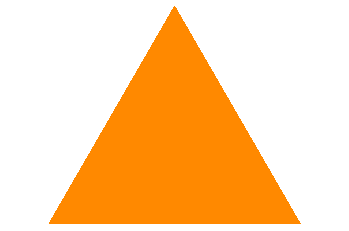

In [45]:
draw_pdf_contours(Dirichlet([1, 1, 1]))

For values of $α_i < 1$,, the distribution concentrates in the corners and along the boundaries of the simplex.

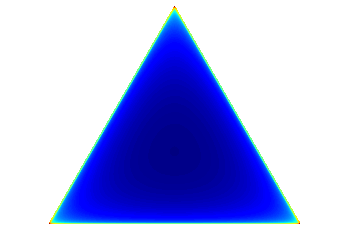

In [47]:
draw_pdf_contours(Dirichlet([0.999, 0.999, 0.999]))

The color scale runs from dark blue (lowest values) to red (highest values). Notice in the plot above that only the corners of the simplex are red and intermediate values lie along the boundary of the simplex.

For values of $α_i > 1$, the distribution tends toward the center of the simplex.

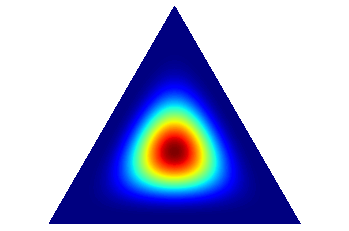

In [48]:
draw_pdf_contours(Dirichlet([5, 5, 5]))

As $α_i$ increases, the distribution becomes more tightly concentrated around the center of the simplex.

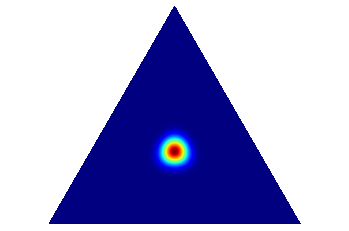

In [49]:
draw_pdf_contours(Dirichlet([50, 50, 50]))

In the context of our example of manufacturing dice, we would produce consistently fair dice in the limit as 
$\alpha_i \rightarrow \infty$.


For a symmetric Dirichlet with $\alpha_i > 1$ , we will produce fair dice, on average. If the goal is to produce loaded dice (e.g., with a higher probability of rolling a 3), we would want an asymmetric (noncentral) Dirichlet distribution with a higher value for 
$\alpha_3$

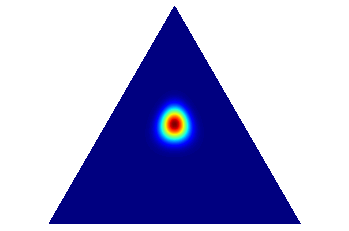

In [50]:
draw_pdf_contours(Dirichlet([30, 30, 50]))

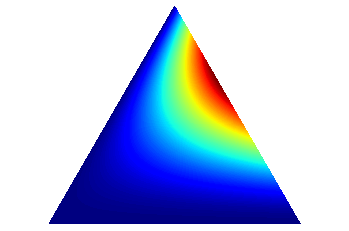

In [51]:
draw_pdf_contours(Dirichlet([1, 2, 3]))

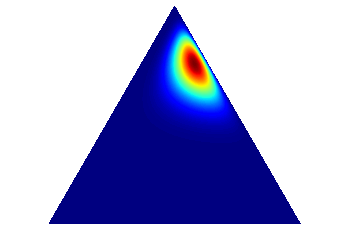

In [52]:
draw_pdf_contours(Dirichlet([2, 5, 15]))